# Predicting Heart Disease in Patients Using Classification

### Introduction:

Heart disease, also known as cardiovascular disease, refers to conditions which affect the heart, the most common of these conditions being coronary artery disease. Heart disease can lead to heart attacks, heart failure, arrhythmias and heart valve diseases. Some risk factors include high blood pressure, high cholesterol, obesity, and a sedentary lifestyle.

The question we attempt to answer is, "Can we predict the severity of heart disease, if any, in a patient based on their age, pain type, cholesterol, max heart rate, exercise induced angina, and gender?".

To answer this, the chosen data set is the “Heart Disease” dataset. Each observation contains details about an individual. It contains 14 variables with different attributes relating to heart disease, including an assigned value of 1-4 regarding the presence of heart disease in the individual.


### Preliminary Exploratory Data Analysis:


Rows: 920 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): sex, dataset, cp, restecg, slope, thal
dbl (8): id, age, trestbps, chol, thalch, oldpeak, ca, num
lgl (2): fbs, exang

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,63,Male,Cleveland,typical angina,145,233,TRUE,lv hypertrophy,150,FALSE,2.3,downsloping,0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160,286,FALSE,lv hypertrophy,108,TRUE,1.5,flat,3,normal,2
3,67,Male,Cleveland,asymptomatic,120,229,FALSE,lv hypertrophy,129,TRUE,2.6,flat,2,reversable defect,1
4,37,Male,Cleveland,non-anginal,130,250,FALSE,normal,187,FALSE,3.5,downsloping,0,normal,0
5,41,Female,Cleveland,atypical angina,130,204,FALSE,lv hypertrophy,172,FALSE,1.4,upsloping,0,normal,0
6,56,Male,Cleveland,atypical angina,120,236,FALSE,normal,178,FALSE,0.8,upsloping,0,normal,0


severity,n,age_avg,chol_avg,percent
<fct>,<int>,<dbl>,<dbl>,<dbl>
0,124,52.07258,244.3952,54.625551
1,40,55.05000,248.4500,17.621145
2,26,58.19231,258.0385,11.453744
3,25,57.16000,241.1200,11.013216
4,12,61.50000,255.2500,5.286344


`summarise()` has grouped output by 'severity'. You can override using the
`.groups` argument.


severity,pain_type,n,percent
<fct>,<chr>,<int>,<dbl>
0,asymptomatic,30,13.2158590
0,atypical angina,31,13.6563877
0,non-anginal,52,22.9074890
0,typical angina,11,4.8458150
1,asymptomatic,26,11.4537445
1,atypical angina,5,2.2026432
1,non-anginal,6,2.6431718
1,typical angina,3,1.3215859
2,asymptomatic,23,10.1321586


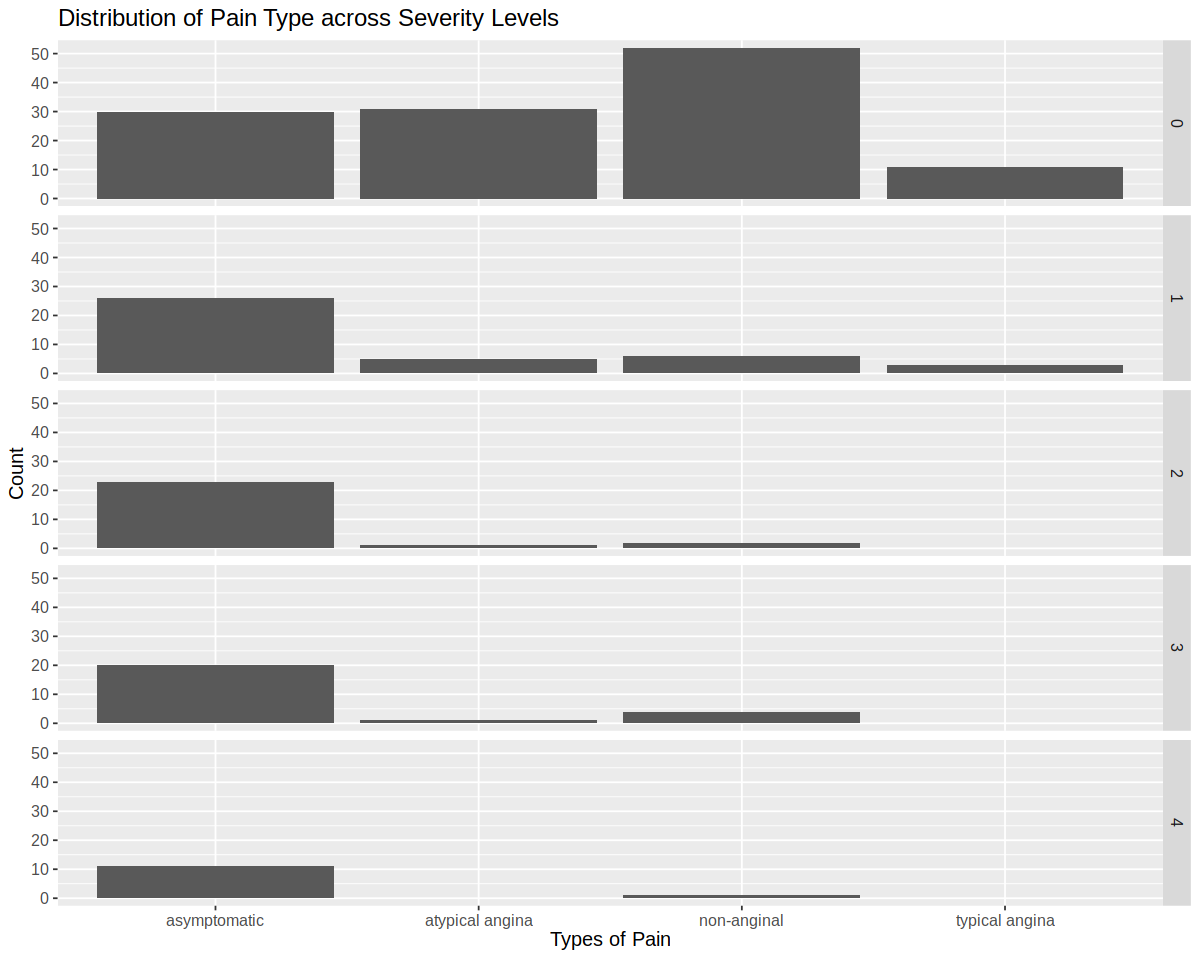

In [15]:
#Load all libraries and set plot dimensions
options(repr.plot.height = 8, repr.plot.width = 10)
library(tidyverse)
library(repr)
library(dplyr)
library(tidymodels)

#Load data frame and rename columns
urlfile= "https://raw.githubusercontent.com/cocom250/DSCI-100-Group-17/main/heart_disease_uci.csv"
heart_disease_data <- read_csv(url(urlfile))
head(heart_disease_data)

heart_disease_data <- rename(heart_disease_data, 
                             region = dataset,
                             pain_type = cp,
                             resting_bps = trestbps,
                             fasting_bs = fbs,
                             resting_ecg = restecg,
                             max_hr = thalch,
                             n_major_vessel = ca,
                             severity = num) 

#Cleaning up data, filtering for Cleveland and selecting predictor columns
heart_disease_data <- filter(heart_disease_data, region == "Cleveland") |>
    mutate(severity = as.factor(severity)) |>
    select(severity, age, pain_type, chol, max_hr, exang, resting_ecg, sex)

#Split the data into training set and testing set
heart_disease_split <- initial_split(heart_disease_data, prop = 0.75, strata = severity)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

#Plot indicating the number and proportion of observations in each severity level & average age and cholestrol measures
severity_stats <- heart_disease_train |>
    group_by(severity) |>
    summarize(n = n(), age_avg = mean(age, na.rm = TRUE), chol_avg = mean(chol, na.rm = TRUE)) |>
    mutate(percent = 100*n/nrow(heart_disease_train))

severity_stats

#Plot indicating the number and proportion of observations with each pain type for different severity level
pain_type_distribution <- heart_disease_train|>
    group_by(severity, pain_type) |>
    summarize(n = n()) |>
    mutate(percent = 100*n/nrow(heart_disease_train))

pain_type_distribution

#Visualization of Pain Type distribution across severity levels
pain_type_distribution_plot <- ggplot(pain_type_distribution, 
                                 aes(x= pain_type, y =n)) +
    geom_bar(stat ="identity") +
    labs(x = "Types of Pain", y = "Count")+
    theme(text = element_text(size =12)) +
    facet_grid(rows = vars(severity)) +
    ggtitle("Distribution of Pain Type across Severity Levels")

pain_type_distribution_plot


### Methods

We will be conducting a classification analysis on the heart disease dataset with the goal of predicting the severity of heart disease (represented by the "severity" variable)

__Data Processing__
* Clean and wrangle the dataset.
* Filter the dataset to include only data from Cleveland in the  "region" column.
* Rename the "num" column to "severity."
* Select the following predictor columns: "severity," "age," "pain_type," "chol," "max_hr," "exang," "resting_ecg," and "sex."

__Data Splitting__
* Split the dataset into training and testing datasets. The training data will be used to train the model, while the testing data will be used to evaluate its performance.

__Model Building__
* Create a classification model based on the chosen specifications.
* Fit the model using the training data, allowing it to learn from the selected input features and class labels.

__Model Evaluation__
* Evaluate the model's performance using various evaluation metrics, such as accuracy precision and recall

__Model Tuning__
* We finally then fine tune the model to optimize its performance

__Describe at least one way that you will visualize the results__

* After evaluating and tuning the model we will often want to know which number of neighbors gives the best accuracy, we can create a visualization of that by plotting the accuracy against K values using a geom_point + geom_line graph. 


### Expected Outcomes & Significance

Through our project, we expect to find a classification model which accurately predicts the severity of heart disease in patients from Cleveland.

__What impact could such findings have?__

Since we can predict whether patients have heart disease or not, for those who are classified to have heart          disease but do not have medical check-ups yet, we can encourage them to check their heart before the disease          becomes prominently serious.
     
__What future questions could this lead to?__

First question would be which factors have the most influence on our prediction. For example, sex, age, pain          type, etc, which factors are mostly related to the patients’ heart disease?

Second question would be after finding out the answer for the first question, how can we “weight” “each factor”      “differently”, not equally therefore we can increase our prediction model in terms of precision and accuracy.


### Expected outcomes and significance:

Through our project, we expect to find a model to predict whether patients from Switzerland have heart disease or not using classification.

Since we can predict whether patients have heart disease or not, for those who are classified to have heart disease but do not have medical check-ups yet, we can encourage them to check their heart before the disease becomes prominently serious.

First question would be which factors have the most influence on our prediction. For example, sex, age, pain type, etc, which factors are mostly related to the patients’ heart disease?
Second question would be after finding out the answer for the first question, how can we “weight” “each factor” “differently”, not equally therefore we can increase our prediction model in terms of precision and accuracy.
